# Example of integrating a network

This notebook illustrates how to create a python network and integrate
it with the scipy library.

In [1]:
import pynucastro as pyna

KeyError: '6an9CYBT'

We'll start again with the basic CNO network explored earlier.  Again, we'll read in the entire ReacLib library
and pass in the names of the rates in the form of a string `A(x,y)B` to filter out just the rates we are interested in.

In [2]:
rl = pyna.ReacLibLibrary()

NameError: name 'pyna' is not defined

In [3]:
rate_names = ["c12(p,g)n13",
              "c13(p,g)n14",
              "n13(,)c13",
              "n13(p,g)o14",
              "n14(p,g)o15",
              "n15(p,a)c12",
              "o14(,)n14",
              "o15(,)n15"]

rates = rl.get_rate_by_name(rate_names)
rates

NameError: name 'rl' is not defined

A `PythonNetwork` is based on a `RateCollection` but has methods to write the RHS of the system of ODEs.

In [4]:
pynet = pyna.PythonNetwork(rates=rates)

NameError: name 'pyna' is not defined

In [5]:
fig = pynet.plot()

NameError: name 'pynet' is not defined

For example, this network knows how to write the full term for a reaction that goes into the $dY/dt$ equation of the ODE system.

Here we pick one of the rates that is part of the network an explore it.

In [6]:
r = pynet.rates[1]
print(r)

NameError: name 'pynet' is not defined

a rate also knows what its contribution is to the $dY/dt$ equation is:

In [7]:
print(r.ydot_string_py())

NameError: name 'r' is not defined

and the code needed to evaluate that rate (the T-dependent part) is output by the `Rate` class::

In [8]:
print(r.function_string_py())

NameError: name 'r' is not defined

The temperature-dependent rate evaluation functions take a `Tfactor` object, which precomputes most of the commonly-used temperature factors in the rates.

The `write_network()` method will output the python code needed to define the RHS of a network for integration with the SciPy integrators.

Since python code can be slow, we use Numba to do just-in-time compilation of the functions to speed things up.

In [9]:
pynet.write_network("cno_test_integrate.py")

NameError: name 'pynet' is not defined

In [10]:
%cat cno_test_integrate.py

cat: cno_test_integrate.py: No such file or directory


We can now import the network that was just created and integrate it using the SciPy ODE solvers

In [11]:
import cno_test_integrate as cno

ModuleNotFoundError: No module named 'cno_test_integrate'

## Integrating the network

We can use the stiff ODE integration solvers that are part of SciPy to integrate this system now

In [12]:
from scipy.integrate import solve_ivp
import numpy as np

Initialize the thermodynamic conditions and initial composition.  We express the composition as molar fractions, `Y0`.

In [13]:
rho = 150
T = 1.5e7

X0 = np.zeros(cno.nnuc)
X0[cno.jp] = 0.7
X0[cno.jhe4] = 0.28
X0[cno.jc12] = 0.02

Y0 = X0/cno.A

NameError: name 'cno' is not defined

Now we integrate.  We use the `BDF` method, since reaction networks are in general stiff

In [14]:
tmax = 1.e20

sol = solve_ivp(cno.rhs, [0, tmax], Y0, method="BDF", jac=cno.jacobian,
                dense_output=True, args=(rho, T), rtol=1.e-6, atol=1.e-6)

NameError: name 'cno' is not defined

## Plotting the results

In [15]:
import matplotlib.pyplot as plt

NameError: name 'cno' is not defined

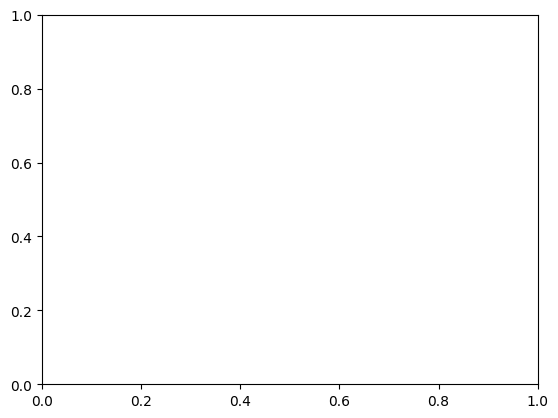

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(cno.nnuc):
    ax.loglog(sol.t, sol.y[i,:] * cno.A[i], label=f"X({cno.names[i].capitalize()})")

ax.set_xlim(1.e10, 1.e20)
ax.set_ylim(1.e-8, 1.0)
ax.legend(fontsize="small")
ax.set_xlabel("t (s)")
ax.set_ylabel("X")

fig.set_size_inches((8, 6))

We can get the energy release from the change in molar abundances, $\Delta Y$.
This will be computed as:

$$\Delta E = -N_A \sum_i \Delta Y_i M_i$$

Here $M_i$ is the mass of the nucleus $i$ (this is tabulated in
the network as `mass[]`).

In [17]:
E = cno.energy_release(sol.y[:,-1] - Y0)
print(f"E = {E:20.10g}")

NameError: name 'cno' is not defined

This result is in erg/g

We can compute the instantaneous energy generation rate as well,

$$\epsilon = -N_A \sum_i \frac{dY_i}{dt} M_i$$

In [18]:
epsilon = cno.energy_release(cno.rhs(0.0, Y0, rho, T))
print(f"epsilon = {epsilon:20.10g}")

NameError: name 'cno' is not defined